## Apply a perspective transform to rectify binary image ("birds-eye view").

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

In [2]:
# Define a function that takes an image, camera matrix and distortion coefficients
# Use cv2.getPerspectiveTransform() to get M, the transform matrix

def perspect_transform(img, src, dst):    
    img_size = (img.shape[1], img.shape[0])
    
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Use cv2.getPerspectiveTransform() to get M, the transform matrix
    M = cv2.getPerspectiveTransform(src, dst)
    
    # Use cv2.warpPerspective() to warp your image to a top-down view
    warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
    
    return warped, M   

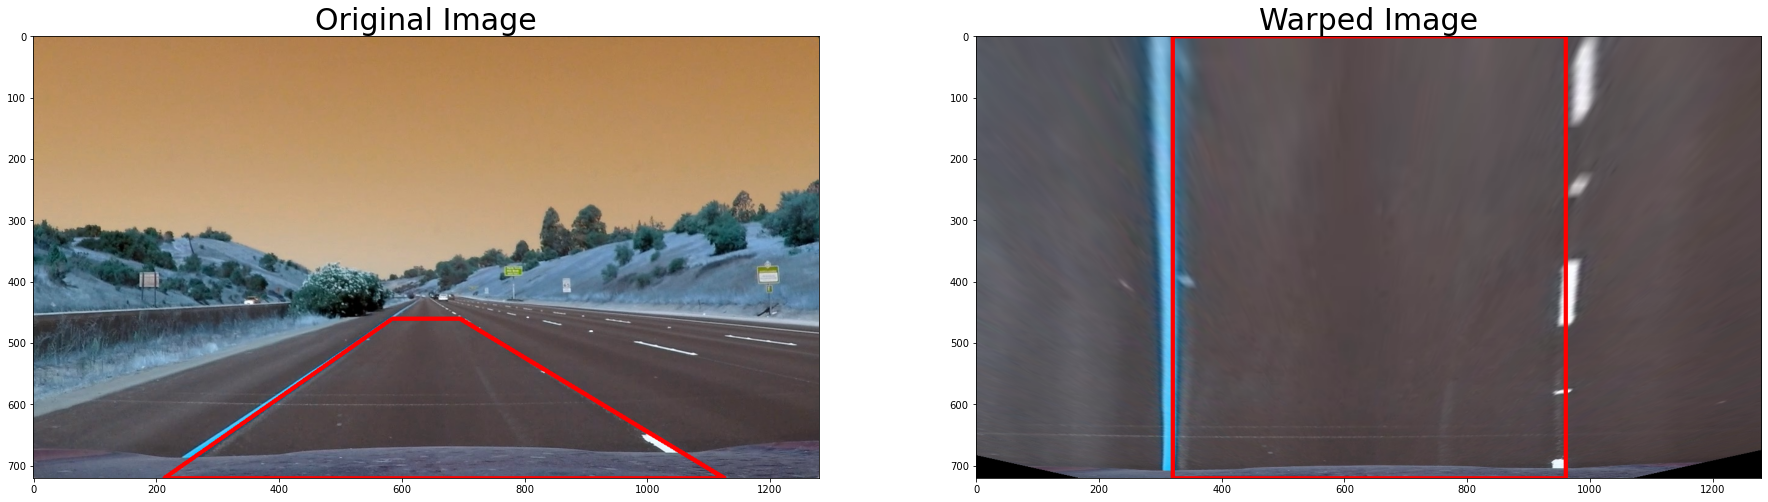

In [27]:
img = cv2.imread('../test_images/straight_lines1.jpg')
img_size = (img.shape[1], img.shape[0])

src = np.float32(
    [[(img_size[0] / 2) - 55, img_size[1] / 2 + 100],
    [((img_size[0] / 6)), img_size[1]],
    [(img_size[0] * 5 / 6) + 60, img_size[1]],
    [(img_size[0] / 2 + 55), img_size[1] / 2 + 100]])
dst = np.float32(
    [[(img_size[0] / 4), 0],
    [(img_size[0] / 4), img_size[1]],
    [(img_size[0] * 3 / 4), img_size[1]],
    [(img_size[0] * 3 / 4), 0]])

top_down, perspective_M = perspect_transform(img, src, dst)

src = src.astype(np.int64)
dst = dst.astype(np.int64)
image = cv2.polylines(img, [src], True, (255, 0, 0), 5)
top_down = cv2.polylines(top_down, [dst], True, (255, 0, 0), 5)

# Save the result file
cv2.imwrite('../output_images/warped_line_image.jpg', top_down)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(top_down)
ax2.set_title('Warped Image', fontsize=30)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)